# **Data Visualization with Python**

# Part 4 WaffleChart_RegressionPlot

#### Author: Avery Jan

#### Date: 3-18-2023

# Overview

This part of the project uses the same Canada Immigration Dataset as in the previous parts to create Waffle Charts and Regression Plots. After the dataset is downloaded and read into a pandas dataframe, the same six-step data preparation procedure used in the previous Parts is used to prepare the data for creating visualizations in this part. The visualizations generated are:

1. Waffle Chart consisting of three sections corresponding to Denmark, Norway, and Sweden, respectively, 1980 - 2013
2. Regression Plot of total immigration to Canada, 1980 - 2013
3. Regression Plot of total immigration from Denmark, Norway, and Sweden, 1980 - 2013

The Waffle Chart is created using functions in Matplotlib while the Regression Plots are generated using functions in Seaborn. 

# The Dataset: Immigration to Canada from 1980 to 2013 <a id="0"></a>

Dataset Source: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous/next residence both for foreigners and nationals. This version of the dataset presents data pertaining to 45 countries of destination.

This part of the project uses the Canada subset that includes data on immigration to Canada from 1980 to 2013.
https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx


***
# Downloading Data <a id="2"></a>


In [1]:
# Install openpyxl (formerly xlrd), a module that pandas requires to read Excel files.

import piplite

await piplite.install(['openpyxl==3.0.9', 'seaborn'])

In [2]:
# Import Primary Modules.

import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

In [3]:
# Download the Canadian Immigration dataset and read it into a pandas dataframe.

from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())

df_can = pd.read_excel(
    text,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
#  View the first five items in our dataset.
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
# Print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


# Preparing Data <a id="2"></a>


In [6]:
# Step 1: Remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# Step 2: Rename some of the columns to meaningful names.
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# Step 3: Make all column labels of type string for consistency.
df_can.columns = list(map(str, df_can.columns))

# Step 4: Set the country name as index for looking up countries using .loc method.
df_can.set_index('Country', inplace = True)

# Step 5: Add a column 'Total' to hold the sum across all years covered in this dataset.
df_can['Total'] =  df_can.sum (axis = 1)

# # Step 6: Create a list of the label of all the years covered in the Canada dataset to faciltate the plotting of visualizations later.
years = list(map(str, range(1980, 2014)))

# Print the dimension of the dataframe following the preparation the data shown above. 
print ('data dimensions:', df_can.shape)

<ipython-input-6-24c3d1f9a9d8>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] =  df_can.sum (axis = 1)


data dimensions: (195, 38)


In [7]:
# Review the changes that have been made to the dataframe.

print('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(5)

data dimensions: (195, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


# Visualizing Data using Matplotlib and Seaborn<a id="4"></a>


In [8]:
# Use the inline backend to generate the plots within the browser.
%matplotlib inline

# Import Matplotlib.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Set the style of plots.
mpl.style.use('ggplot')

# Check for latest version of Matplotlib.
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.5.1


# 1. Waffle Charts <a id="6"></a>

## (a) Defining a function to create a waffle chart

#### The function 'create_waffle_chart' defined below takes the following parameters as input:

> 1.  **categories**: Unique categories or classes in dataframe.
> 2.  **values**: Values corresponding to categories or classes.
> 3.  **height**: Defined height of waffle chart.
> 4.  **width**: Defined width of waffle chart.
> 5.  **colormap**: Colormap class
> 6.  **value_sign**: In order to make the function more generalizable, this parameter is added to address signs that could be associated with a value such as %, $, and so on. **value_sign** has a default value of empty string.


In [9]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # Step 1: Compute the proportion of each category(class) with respect to the total.
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # Step 2: Compute the total number of tiles
    total_num_tiles = width * height # total number of tiles.
    print ('Total number of tiles is', total_num_tiles)
    
    # Step 3: Compute the number of tiles for each catagory.
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # Step 4: Print out number of tiles per category.
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # Step 5: Initialize the waffle chart as an empty matrix.
    waffle_chart = np.zeros((height, width))

    # Step 6: Define indices to loop through waffle chart.
    category_index = 0
    tile_index = 0

    # Step 7: Populate the waffle chart.
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # If the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # Set the class value to an integer, which increases with class.
            waffle_chart[row, col] = category_index
    
    # Instantiate a new figure object.
    fig = plt.figure()

    # Use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # Get the axis.
    ax = plt.gca()

    # Set minor ticks.
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # Add gridlines based on minor ticks.
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # Step 8: Calcualte cumulative sum, create a legend, and add it to the waffle chart. 
    # Compute cumulative sum of individual categories to match color schemes between chart and legend.
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # Create legend.
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # Add legend to chart.
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

    # Display the waffle chart. 
    plt.show()

<br>

## (b) Creating waffle chart of  Denmark, Norway, and Sweden

In [10]:
# Goal: Create a waffle chart to show the immigration from Denmark, Norway, and Sweden to Canada.

# Step 1: Create a new dataframe that contains the data of these three countries. 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# View the dataframe.
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [11]:
# Step 2: Define the values of the input parameters of the 'crate_waffle_chart function.

width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<ipython-input-9-d9c17d93b76b>:45: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


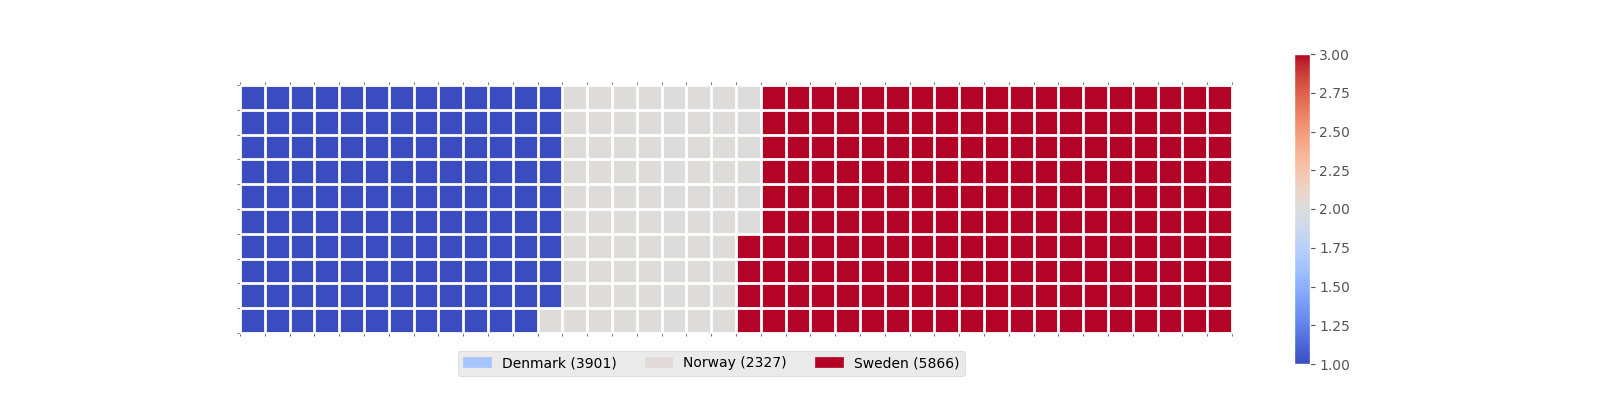

<Figure size 640x480 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

In [12]:
# Step 3: Call the 'crate_waffle_chart function to create a waffle chart. 

create_waffle_chart(categories, values, height, width, colormap)

<br>

# 2. Regression Plots <a id="10"></a>

In [13]:
# Install seaborn
# !pip3 install seaborn

# import library
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


## (a) Regression plot of total immigration to Canada, 1980 - 2013

In [14]:
# Goal: Create a regplot of Total number of immigrants to Canada in the period 1980 - 2013. 

# Step 1: Create a new dataframe that stores that total number of landed immigrants to Canada per year from 1980 to 2013.

## Use the sum() method to get the total population per year.
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

## change the years to type float to facilitate the plotting of the regplot later. 
df_tot.index = map(float, df_tot.index)

## Reset the index to put it back in the df_tot dataframe as a column.
df_tot.reset_index(inplace=True)

## Rename the columns.
df_tot.columns = ['year', 'total']

# View the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


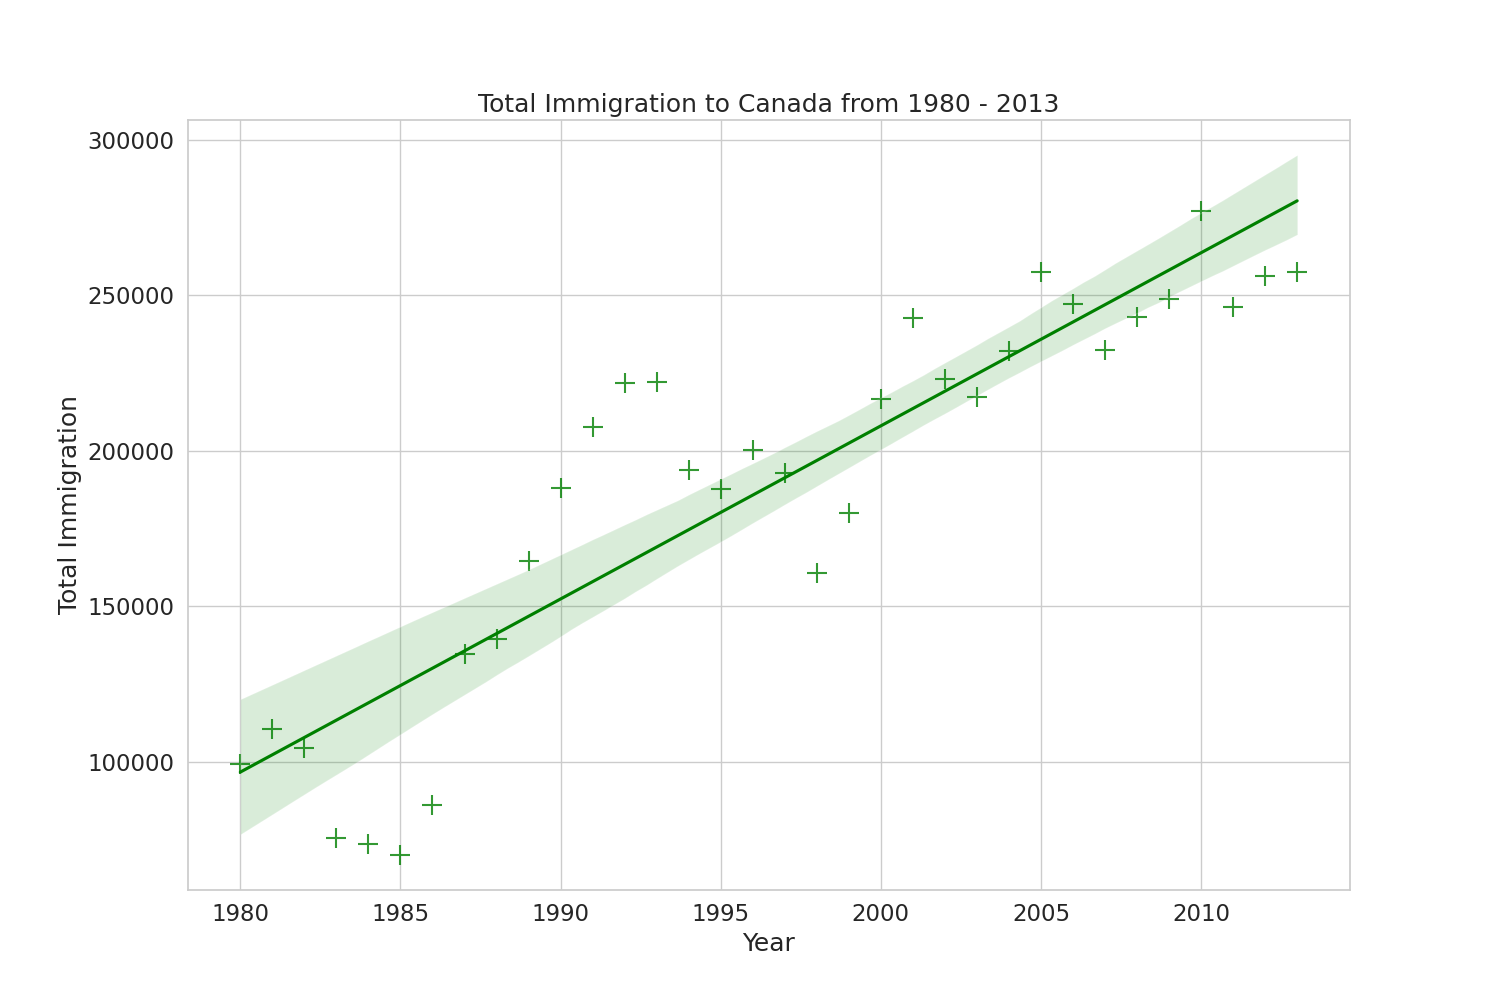

<Figure size 1500x1000 with 0 Axes>

In [15]:
# Step 2: Set the figure size.
plt.figure(figsize=(15, 10))

# Step 3: Increase the font size of the tickmark labels, the title, and the x- and y-labels. 
sns.set(font_scale=1.5)

# Step 4: Set the background to a white background with gridlines.
sns.set_style('whitegrid')

# Step 5: Generate the regplot using seaborn. 
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

# Step 6: Add a title and axes labels. 
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

# Step 7: Display the plot.
plt.show()

<br>

## (b) Regression plot of Denmark, Sweden, and Norway, 1980 - 2013

Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

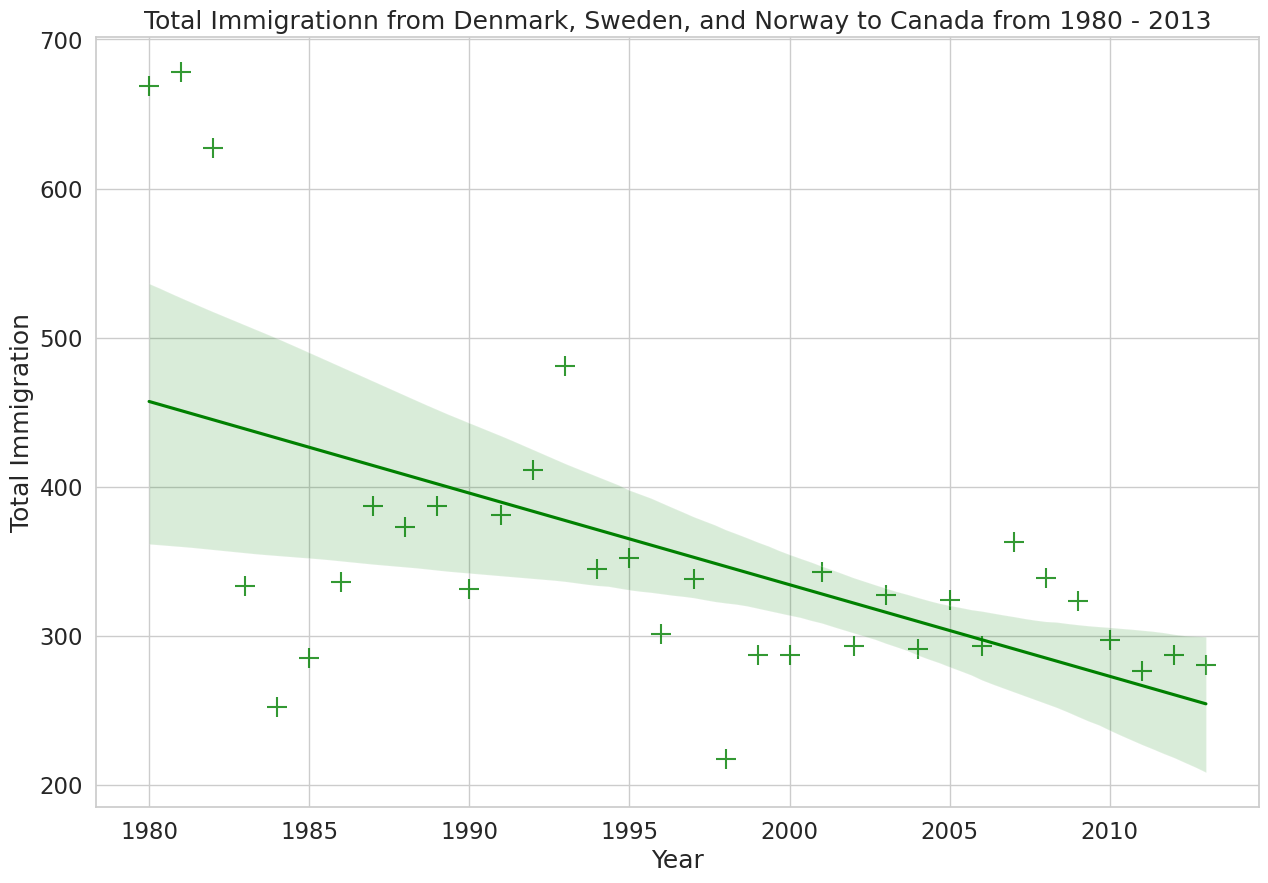

In [16]:
# Goal: Use seaborn to create a regplot of the total immigration from Denmark, Sweden, and Norway to Canada from 1980 t0 2013.

# Step 1: Create df_countries dataframe.
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# Step 2: Create df_total by summing across three countries for each year.
df_total = pd.DataFrame(df_countries.sum(axis=1))

# Step 3: Reset index in place.
df_total.reset_index(inplace=True)

# Step 4: Rename columns.
df_total.columns = ['year', 'total']

# Step 5: Change column 'year' from string to int to create scatter plot.
df_total['year'] = df_total['year'].astype(int)

# Step 6: Define figure size.
plt.figure(figsize=(15, 10))

# Step 7: Define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# Step 8: Generate the plot.
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})

# Step 9: Add a title and axes labels.
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')